In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
import seaborn as sns

%matplotlib inline

In [93]:
os.chdir("E:\\TD_senior_business_insights_case")

In [94]:
acc = pd.read_csv("BusinessCase_Accts.csv",index_col=[0])
customer = pd.read_csv("BusinessCase_Custs.csv",index_col=[0])
trans = pd.read_csv("BusinessCase_Tx.csv",index_col=[0])

In [31]:
acc.head(5)

,branchNumber,type,openDate,id,iban,balance,currency,cust_id
0,1416,DDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_1894a538-...,NaN,447.56,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_c418b5e6-...
1,1416,SDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_e4d4cce1-...,NaN,4592.68,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_c418b5e6-...
2,324,DDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_b4c1aad5-...,NaN,4132.75,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_be23d561-...
3,324,SDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_f71001df-...,NaN,2110.26,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_be23d561-...
4,1728,DDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_ec10146d-...,NaN,16981.85,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_9ed43d58-...


In [32]:
customer.head(5)

,id,type,gender,birthDate,workActivity,occupationIndustry,totalIncome,relationshipStatus,habitationStatus,addresses_principalResidence_province,schoolAttendance,schools
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_1bf5af3c-...,Personal,Male,12/26/1985,NaN,NaN,0.0,Single,Group,ON,NaN,NaN
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_6e740a94-...,Personal,Female,1/30/1977,fulltime,5221 Depository credit intermediation,40009.2,Married,With Spouse,ON,NaN,NaN
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_3918fdef-...,Personal,Female,11/22/2003,NaN,NaN,0.0,Single,With Parent,ON,Secondary,1.0
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_d81a6d15-...,Personal,Other,5/7/1983,fulltime,"5412 Accounting, tax preparation, bookkeeping ...",44709.0,Married,With Spouse,ON,NaN,NaN
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_e21dfbc8-...,Personal,Male,1/29/1983,fulltime,4855 Charter bus industry,21496.0,Single,With Parent,ON,NaN,NaN


In [266]:
trans.value_counts("merchantId")

merchantId
852223a6-f227-4e4c-818e-36bb880866f2    6667
5819eb82-0a1b-4052-a0b3-f3d3eec7e7fd    4593
5d3dd80d-8ff0-4e7c-a02b-8b50aa63aae5    3425
67349999-dc70-424e-9cc8-0715bd3f3a0f    1439
d9dfeb8a-afcb-4c4a-aad1-7efd43fe9c4d    1327
                                        ... 
585daf6b-d852-4890-83e6-22b711ea4ca7       1
8a56b80b-74ac-4ad6-87b6-4e080fcdba73       1
ed20db0e-4610-4fff-b1f8-9759c5000954       1
a6ea34f6-d8ea-4500-9648-ff3a71d16661       1
44198277-8dad-4bc1-817a-502022adfa38       1
Length: 738, dtype: int64

In [269]:
trans.value_counts("categoryTags")

categoryTags
Transfer               40700
Income                 17391
Bills and Utilities    16118
Food and Dining        11346
Taxes                   2095
Mortgage and Rent       1599
Shopping                1431
Home                     599
Fees and Charges         503
Travel                   212
Entertainment            126
Auto and Transport        30
Health and Fitness         8
Kids                       2
dtype: int64

In [272]:
trans[trans["categoryTags"] == "Bills and Utilities"]

,description,currencyAmount,locationRegion,locationCity,originationDateTime,customerId,merchantId,accountId,categoryTags
2,ROGERS CABLE E2I6X9,111.98,NaN,NaN,2018-04-30 00:00:00.002000+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_ad635ae8-...,3d99af81-c081-4d73-bc44-d3a8e639b22a,fe51c153-fbec-4b64-9b00-2530035ef0e1_b527eb36-...,Bills and Utilities
5,ROGERS CABLE L8Q8R8,118.47,NaN,NaN,2018-08-13 00:00:00.002000+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_454f2e57-...,3d99af81-c081-4d73-bc44-d3a8e639b22a,fe51c153-fbec-4b64-9b00-2530035ef0e1_10adef9b-...,Bills and Utilities
8,BELL CANADA R7F8L1,81.25,NaN,NaN,2018-07-26 00:00:00.002000+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_473dcf0b-...,338b9026-ebdd-4f32-8e01-4a46572b0d65,fe51c153-fbec-4b64-9b00-2530035ef0e1_3e2ed19a-...,Bills and Utilities
12,PROP 4875539 INS,75.64,NaN,NaN,2018-04-02 00:00:00.003000+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_0170a05e-...,5d3dd80d-8ff0-4e7c-a02b-8b50aa63aae5,fe51c153-fbec-4b64-9b00-2530035ef0e1_dd7a2dc7-...,Bills and Utilities
13,BELL CANADA T8E4B6,80.66,NaN,NaN,2018-08-20 00:00:00.001000+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_f70f0abe-...,338b9026-ebdd-4f32-8e01-4a46572b0d65,fe51c153-fbec-4b64-9b00-2530035ef0e1_09cb0173-...,Bills and Utilities
...,...,...,...,...,...,...,...,...,...
92274,PROP 5892888 INS,0.00,NaN,NaN,2018-04-02 00:00:00.003000+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_97046a71-...,5d3dd80d-8ff0-4e7c-a02b-8b50aa63aae5,fe51c153-fbec-4b64-9b00-2530035ef0e1_e17db009-...,Bills and Utilities
92276,TOR HYD ELEC WPIOI3,42.15,NaN,NaN,2018-10-01 00:00:00.003000+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_3fb1f56b-...,67349999-dc70-424e-9cc8-0715bd3f3a0f,fe51c153-fbec-4b64-9b00-2530035ef0e1_9d7362a4-...,Bills and Utilities
92287,PROP 2819888 INS,121.20,NaN,NaN,2018-08-01 00:00:00.003000+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_8455a89f-...,5d3dd80d-8ff0-4e7c-a02b-8b50aa63aae5,fe51c153-fbec-4b64-9b00-2530035ef0e1_efdaeb59-...,Bills and Utilities
92289,VOICE NETWORK INC.,82.08,NaN,NaN,2018-09-04 00:00:00.004000+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_0d52b182-...,8970ac15-e9a7-426c-87d1-1f0b7d3cd766,fe51c153-fbec-4b64-9b00-2530035ef0e1_8e10be3b-...,Bills and Utilities


In [33]:
trans.head(5)

,description,currencyAmount,locationRegion,locationCity,originationDateTime,customerId,merchantId,accountId,categoryTags
0,ADP PMT 59964899,1092.22,NaN,NaN,2018-06-28T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_fa967441-...,NaN,fe51c153-fbec-4b64-9b00-2530035ef0e1_5b35142d-...,Income
1,ADP PMT 78870688,701.11,NaN,NaN,2018-06-28T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_ee129e70-...,NaN,fe51c153-fbec-4b64-9b00-2530035ef0e1_9172eb97-...,Income
2,ROGERS CABLE E2I6X9,111.98,NaN,NaN,2018-04-30T00:00:00.002Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_ad635ae8-...,3d99af81-c081-4d73-bc44-d3a8e639b22a,fe51c153-fbec-4b64-9b00-2530035ef0e1_b527eb36-...,Bills and Utilities
3,TIM HORTONS #990 _F,1.16,NaN,NaN,2018-10-09T15:30:00Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_12bd4e47-...,7cc23aa6-0671-4c44-a1b5-b8a98d4bc5d4,fe51c153-fbec-4b64-9b00-2530035ef0e1_1185d0e2-...,Food and Dining
4,EMAIL TFR C0***oHp,41.00,NaN,NaN,2018-07-05T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_fb97a9de-...,NaN,fe51c153-fbec-4b64-9b00-2530035ef0e1_bf889f32-...,Transfer


In [34]:
acc.columns, customer.columns, trans.columns

(Index(['branchNumber', 'type', 'openDate', 'id', 'iban', 'balance', 'currency',
        'cust_id'],
       dtype='object'),
 Index(['id', 'type', 'gender', 'birthDate', 'workActivity',
        'occupationIndustry', 'totalIncome', 'relationshipStatus',
        'habitationStatus', 'addresses_principalResidence_province',
        'schoolAttendance', 'schools'],
       dtype='object'),
 Index(['description', 'currencyAmount', 'locationRegion', 'locationCity',
        'originationDateTime', 'customerId', 'merchantId', 'accountId',
        'categoryTags'],
       dtype='object'))

# Part i. Data Manipulation Questions

### Create SQL Database

In [21]:
import sqlite3

In [22]:
conn = sqlite3.connect('test_database')
c = conn.cursor()

In [26]:
c.execute('CREATE TABLE IF NOT EXISTS acc (branchNumber,type,openDate,id,iban,balance,currency,cust_id)')
c.execute('CREATE TABLE IF NOT EXISTS customer (id,type,gender,birthDate,workActivity,occupationIndustry,totalIncome,relationshipStatus,habitationStatus,addresses_principalResidence_province,schoolAttendance,schools)')
c.execute('CREATE TABLE IF NOT EXISTS trans (description,currencyAmount,locationRegion,locationCity,originationDateTime,customerId,merchantId,accountId,categoryTags)')
conn.commit()

In [27]:
acc.to_sql('acc', conn, if_exists='replace', index = False)
customer.to_sql('customer', conn, if_exists='replace', index = False)
trans.to_sql("trans", conn, if_exists='replace', index = False)

**What branch has the most number of customers?**

In [239]:
c.execute('''  
SELECT branchNumber, COUNT(DISTINCT(cust_id)) AS cust_count
FROM acc
GROUP BY acc.branchNumber
ORDER BY cust_count DESC
LIMIT 1
          ''')

for row in c.fetchall():
    print (row)

(1029, 151)


In [256]:
# python solution

acc.groupby("branchNumber").agg(['min', 'max', 'count', 'nunique'])["cust_id"].sort_values("nunique",ascending=False).head(1)

,min,max,count,nunique
branchNumber,,,,
1029,fe51c153-fbec-4b64-9b00-2530035ef0e1_02c67b22-...,fe51c153-fbec-4b64-9b00-2530035ef0e1_fcd38d39-...,302,151


**How old is the oldest customer as of 2019-07-01?**

In [114]:
# sql solution

# c.execute('''  
# SELECT id, 
#        type,
#        gender, 
#        birthDate,
#        DATEDIFF(year, birthDate, '2019-07-01') AS age
# FROM customer
# ORDER BY age DESC
# LIMIT 1
# ''')

# for row in c.fetchall():
#     print (row)

In [115]:
# python solution


# # create a custom age function to calcualte age
as_of_date = datetime.strptime('2019-07-01','%Y-%m-%d')


def calculate_age(born):
    born = datetime.strptime(born, '%m/%d/%Y').date()
    return as_of_date.year - born.year - ((as_of_date.month, as_of_date.day) < (born.month, born.day))

customer['age'] = customer['birthDate'].apply(calculate_age)

In [449]:
customer.sort_values("age",ascending = False).head(5)

,id,type,gender,birthDate,workActivity,occupationIndustry,totalIncome,relationshipStatus,habitationStatus,addresses_principalResidence_province,schoolAttendance,schools,age
2146,fe51c153-fbec-4b64-9b00-2530035ef0e1_522519ff-...,Personal,Female,10/22/1912,NaN,Retired,52652.60,Widowed,NaN,ON,NaN,nan,109
5241,fe51c153-fbec-4b64-9b00-2530035ef0e1_3e49a7de-...,Personal,Other,4/4/1913,NaN,Retired,62953.10,Widowed,Group,ON,NaN,nan,108
2974,fe51c153-fbec-4b64-9b00-2530035ef0e1_f2fce238-...,Personal,Female,8/15/1914,NaN,Retired,67768.40,Widowed,NaN,ON,NaN,nan,107
2744,fe51c153-fbec-4b64-9b00-2530035ef0e1_33657ccd-...,Personal,Female,9/18/1918,NaN,Retired,24929.10,Widowed,NaN,ON,NaN,nan,103
1661,fe51c153-fbec-4b64-9b00-2530035ef0e1_dae9236a-...,Personal,Female,7/11/1919,NaN,Retired,37324.00,Widowed,NaN,ON,NaN,nan,102


**How many accounts does the oldest customer have?**

In [130]:
# sql solution

c.execute('''  
SELECT customer.id,
       birthDate,
       COUNT(acc.id) AS count_acc
FROM customer
JOIN acc
ON customer.id = acc.cust_id
WHERE customer.birthDate = '10/22/1912'
''')

for row in c.fetchall():
    print (row)

('fe51c153-fbec-4b64-9b00-2530035ef0e1_522519ff-5e56-4d8a-9888-560f2cde4938', '10/22/1912', 2)


**How many transactions went to Starbucks in April?**

In [145]:
# sql solution

c.execute('''  
SELECT COUNT(description) AS trans_count
FROM trans
WHERE UPPER(description) LIKE '%STARBUCKS%'
AND originationDateTime LIKE "____-04%"
''')

for row in c.fetchall():
    print (row)

(395,)


In [ ]:
# python solution

**How much was spent on Starbucks in April?**

In [160]:
# sql solution

c.execute('''  
SELECT SUM(currencyAmount)
FROM trans
WHERE UPPER(description) LIKE '%STARBUCKS%'
AND originationDateTime LIKE "____-04%"
''')

for row in c.fetchall():
    print (row)

(1720.8700000000015,)


**Hypothesis Testing: Is the average spend at Starbucks (statistically) significantly different in April compared to June?**

In [163]:
# sql solution

# first calculate the avg starbucks spend in April
c.execute('''  
SELECT SUM(currencyAmount)/COUNT(currencyAmount)
FROM trans
WHERE UPPER(description) LIKE '%STARBUCKS%'
AND originationDateTime LIKE "____-04%"
''')

for row in c.fetchall():
    print (row)
    
    
# then calculate the avg starbucks spend in June
c.execute('''  
SELECT SUM(currencyAmount)/COUNT(currencyAmount)
FROM trans
WHERE UPPER(description) LIKE '%STARBUCKS%'
AND originationDateTime LIKE "____-06%"
''')

for row in c.fetchall():
    print (row)

(4.356632911392409,)
(4.4984334203655365,)


In [172]:
apr_spend = 4.356632911392409
jun_spend = 4.4984334203655365

diff = jun_spend - apr_spend
diff_percen = diff / apr_spend

print('The average spend in STARBUCKS in June is {} more than in April'.format(round(diff,2)))
print('Which is around {}% lift compared to April, not  significantly different'.format(round(diff_percen*100,2)))

The average spend in STARBUCKS in June is 0.14 more than in April
Which is around 3.25% lift compared to April, not  significantly different


**Which date exhibited the highest average spend above trend at Starbucks (based on a 10-period moving average, ignoring missing dates)?**


In [175]:
# python solution

trans["originationDateTime"] = trans["originationDateTime"].apply(pd.to_datetime)

In [179]:
trans_sort_dates = trans.sort_values('originationDateTime')

trans_sort_dates['rolling_10_avg'] = trans_sort_dates['currencyAmount'].rolling(10).mean()

In [455]:
# sort_values based on ['rolling_10_avg']
# 2018-10-02 has the highest spending

trans_sort_dates[trans_sort_dates["description"].
                 str.contains("STARBUCKS", case=False)].sort_values('rolling_10_avg',ascending=False)

,description,currencyAmount,locationRegion,locationCity,originationDateTime,customerId,merchantId,accountId,categoryTags,rolling_10_avg
65257,STARBUCKS #4210,5.45,nan,nan,2018-10-02 07:06:00+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_cc2f24d5-...,d6e59168-b4a9-42b9-b96d-158bfb43a158,fe51c153-fbec-4b64-9b00-2530035ef0e1_869d9db8-...,Food and Dining,163.93
17072,STARBUCKS #4765,3.37,nan,nan,2018-07-10 07:00:00+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_ebce91b0-...,45fd3166-7ef3-40dd-be9f-a99af37b2f7e,fe51c153-fbec-4b64-9b00-2530035ef0e1_28bbc704-...,Food and Dining,150.16
63284,STARBUCKS #4613,6.00,nan,nan,2018-10-02 07:47:00+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_f3e24421-...,18564167-49eb-4784-8dfc-5f309cd5c5b9,fe51c153-fbec-4b64-9b00-2530035ef0e1_29e9f963-...,Food and Dining,148.79
66042,STARBUCKS #13035,2.51,nan,nan,2018-07-10 07:14:00+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_e28d8472-...,ac0ebe47-4ff4-4da5-8760-dff942ebdf31,fe51c153-fbec-4b64-9b00-2530035ef0e1_ea24127e-...,Food and Dining,131.25
72843,STARBUCKS #4717,1.01,nan,nan,2018-07-27 07:24:00+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_fa3b41a0-...,e5e53d12-516f-4146-aff5-13c0e5f750e8,fe51c153-fbec-4b64-9b00-2530035ef0e1_3242bffc-...,Food and Dining,121.28
...,...,...,...,...,...,...,...,...,...,...
50842,STARBUCKS #15928,1.36,nan,nan,2018-09-06 16:26:00+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_2fffe9e3-...,e249703b-3a45-42d3-a48d-597ece50669f,fe51c153-fbec-4b64-9b00-2530035ef0e1_b718cd46-...,Food and Dining,2.79
37920,STARBUCKS #53982,2.57,nan,nan,2018-10-04 18:08:00+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_ecfc3d6d-...,b0529376-c72e-47c3-8de6-a51318e9320e,fe51c153-fbec-4b64-9b00-2530035ef0e1_bdea0edb-...,Food and Dining,2.72
43148,STARBUCKS #4210,1.77,nan,nan,2018-09-06 16:41:00+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_99636ecb-...,d6e59168-b4a9-42b9-b96d-158bfb43a158,fe51c153-fbec-4b64-9b00-2530035ef0e1_ee840f06-...,Food and Dining,2.68
7156,STARBUCKS #4540,2.36,nan,nan,2018-10-02 19:13:00+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_31478845-...,1c65e51e-8e57-4376-9ddf-7ddd54d1873a,fe51c153-fbec-4b64-9b00-2530035ef0e1_e5b3d51d-...,Food and Dining,2.67


# Part ii. Business Case

**1. We are planning to launch a new product focused on a specific merchant category (e.g. travel credit card). Which specific merchant category would you like to focus on for this new product?  Please explain your rationale for this category incorporating both the insights derived from the data and other concepts where you see fit.**


In [191]:
trans.value_counts('categoryTags')

categoryTags
Transfer               40700
Income                 17391
Bills and Utilities    16118
Food and Dining        11346
Taxes                   2095
Mortgage and Rent       1599
Shopping                1431
Home                     599
Fees and Charges         503
Travel                   212
Entertainment            126
Auto and Transport        30
Health and Fitness         8
Kids                       2
dtype: int64

In [ ]:
# see tableau worksheet

**2. Identify and describe various segments of customers within the data.  Consider applying segmenting/clustering techniques to aid in the development of your answer.**

In [ ]:
# drop age columns from previous questions

customer.drop(columns="age",inplace = True)

In [469]:
# redefine the age as it is of today's date

def calculate_age_today(born):
    born = datetime.strptime(born, '%m/%d/%Y').date()
    today = datetime.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

customer['age'] = customer['birthDate'].apply(calculate_age_today)

In [470]:
customer.head(5)

,id,type,gender,birthDate,workActivity,occupationIndustry,totalIncome,relationshipStatus,habitationStatus,addresses_principalResidence_province,schoolAttendance,schools,age
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_1bf5af3c-...,Personal,Male,12/26/1985,NaN,NaN,0.00,Single,Group,ON,NaN,nan,35
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_6e740a94-...,Personal,Female,1/30/1977,fulltime,5221 Depository credit intermediation,40009.20,Married,With Spouse,ON,NaN,nan,44
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_3918fdef-...,Personal,Female,11/22/2003,NaN,NaN,0.00,Single,With Parent,ON,Secondary,1.00,17
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_d81a6d15-...,Personal,Other,5/7/1983,fulltime,"5412 Accounting, tax preparation, bookkeeping ...",44709.00,Married,With Spouse,ON,NaN,nan,38
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_e21dfbc8-...,Personal,Male,1/29/1983,fulltime,4855 Charter bus industry,21496.00,Single,With Parent,ON,NaN,nan,38


### clustering on joined customer data 

In [471]:
customer.columns

Index(['id', 'type', 'gender', 'birthDate', 'workActivity',
       'occupationIndustry', 'totalIncome', 'relationshipStatus',
       'habitationStatus', 'addresses_principalResidence_province',
       'schoolAttendance', 'schools', 'age'],
      dtype='object')

In [472]:
# re-define the database that contains customer age

c.execute('CREATE TABLE IF NOT EXISTS acc (branchNumber,type,openDate,id,iban,balance,currency,cust_id)')
c.execute('CREATE TABLE IF NOT EXISTS customer (id,type,gender,birthDate,workActivity,occupationIndustry,totalIncome,relationshipStatus,habitationStatus,addresses_principalResidence_province,schoolAttendance,schools,age)')
c.execute('CREATE TABLE IF NOT EXISTS trans (description,currencyAmount,locationRegion,locationCity,originationDateTime,customerId,merchantId,accountId,categoryTags)')
conn.commit()

In [473]:
acc.to_sql('acc', conn, if_exists='replace', index = False)
customer.to_sql('customer', conn, if_exists='replace', index = False)
trans.to_sql("trans", conn, if_exists='replace', index = False)

In [485]:

c.execute('''  
SELECT customer.id,
       gender,
       workActivity,
       totalIncome,
       relationshipStatus,
       habitationStatus,
       schoolAttendance,
       schools,
       age,
       SUM(balance),
       SUM(currencyAmount)
FROM customer
JOIN acc
ON customer.id = acc.cust_id
JOIN trans
ON customer.id = trans.customerId
GROUP BY customer.id
''')

# print(c.fetchall())


customer_joined =pd.DataFrame(data=c.fetchall(),columns=["cust_id",
                                        "gender",
                                        "workActivity",
                                        "totalIncome",
                                        "relationshipStatus",
                                        "habitationStatus",
                                        "schoolAttendance",
                                        "schools",
                                        "age",
                                        "total_balance",
                                        "total_amount"])

In [487]:
customer_joined.head(5)

,cust_id,gender,workActivity,totalIncome,relationshipStatus,habitationStatus,schoolAttendance,schools,age,total_balance,total_amount
0,fe51c153-fbec-4b64-9b00-2530035ef0e1_00004760-...,Female,None,14271.60,Widowed,Group,None,nan,91,375538.57,34542.88
1,fe51c153-fbec-4b64-9b00-2530035ef0e1_000d112c-...,Male,parttime,10711.80,Single,With Parent,College,nan,25,284670.54,8578.32
2,fe51c153-fbec-4b64-9b00-2530035ef0e1_000f6f85-...,Female,None,0.00,Single,With Parent,College,nan,24,11099.40,672.00
3,fe51c153-fbec-4b64-9b00-2530035ef0e1_00155381-...,Female,None,56339.50,Widowed,None,None,nan,95,121579.44,1712.46
4,fe51c153-fbec-4b64-9b00-2530035ef0e1_001588f9-...,Male,parttime,25999.60,Married,With Spouse,None,nan,66,126450.00,29395.88


GridSpec(6, 6)

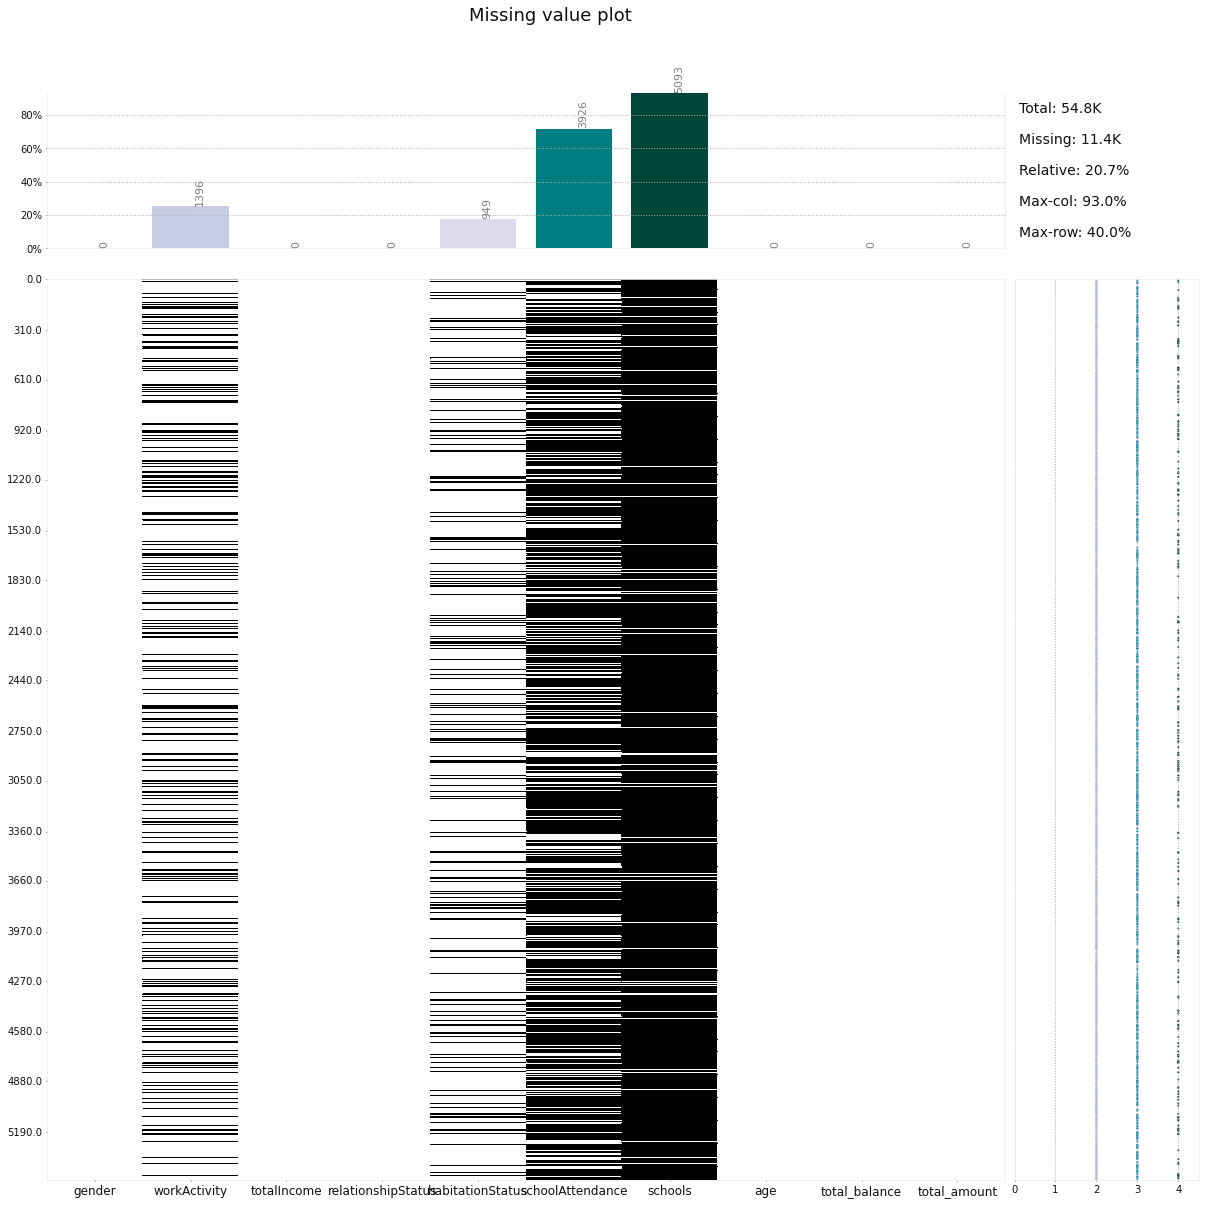

In [322]:
klib.missingval_plot(customer_joined)

In [488]:
# fill missing values

customer_joined["workActivity"] = customer_joined["workActivity"].fillna(value="unknown")
customer_joined["habitationStatus"] = customer_joined["habitationStatus"].fillna(value="unknown")
customer_joined["schoolAttendance"] = customer_joined["schoolAttendance"].fillna(value="unknown")
customer_joined["schools"] = customer_joined["schools"].fillna(value=0)


# there is no missing values
customer_joined.isna().sum()

cust_id               0
gender                0
workActivity          0
totalIncome           0
relationshipStatus    0
habitationStatus      0
schoolAttendance      0
schools               0
age                   0
total_balance         0
total_amount          0
dtype: int64

In [489]:
customer_joined_numeric = customer_joined.select_dtypes(include=np.number).columns
customer_joined_categorical = customer_joined.select_dtypes(exclude=np.number).columns

customer_joined_numeric, customer_joined_categorical

(Index(['totalIncome', 'schools', 'age', 'total_balance', 'total_amount'], dtype='object'),
 Index(['cust_id', 'gender', 'workActivity', 'relationshipStatus',
        'habitationStatus', 'schoolAttendance'],
       dtype='object'))

**takeaways: ordinal encoder is better than one-hot**

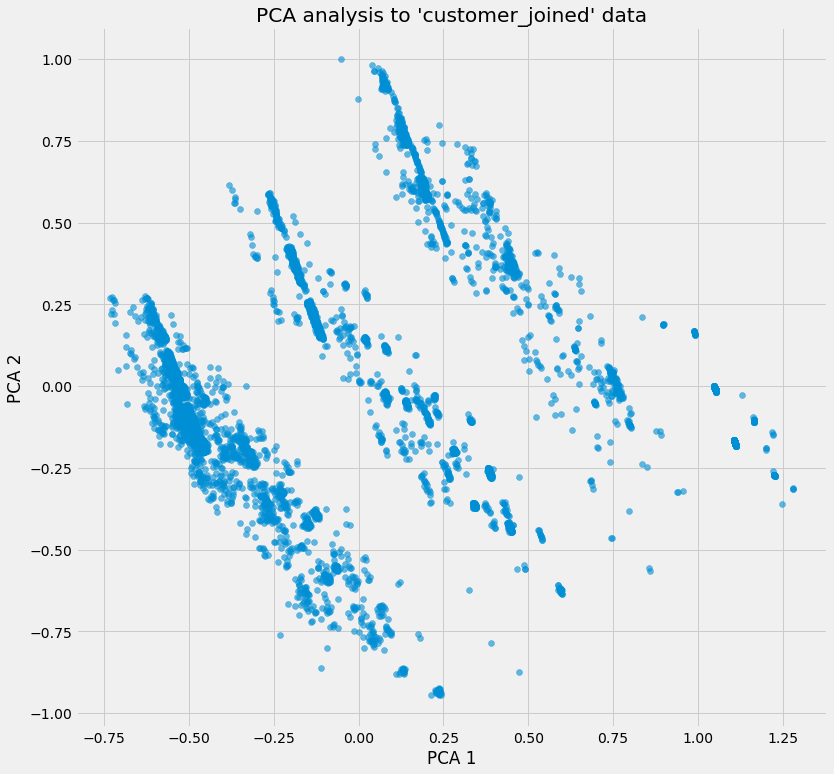

PC_1 explains 0.3457802297104248, PC_2 explains 0.2111239397685962
Total ratio explained by PC_1 and PC_2 is 1.0000000000000002


C:\Users\jiawe\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


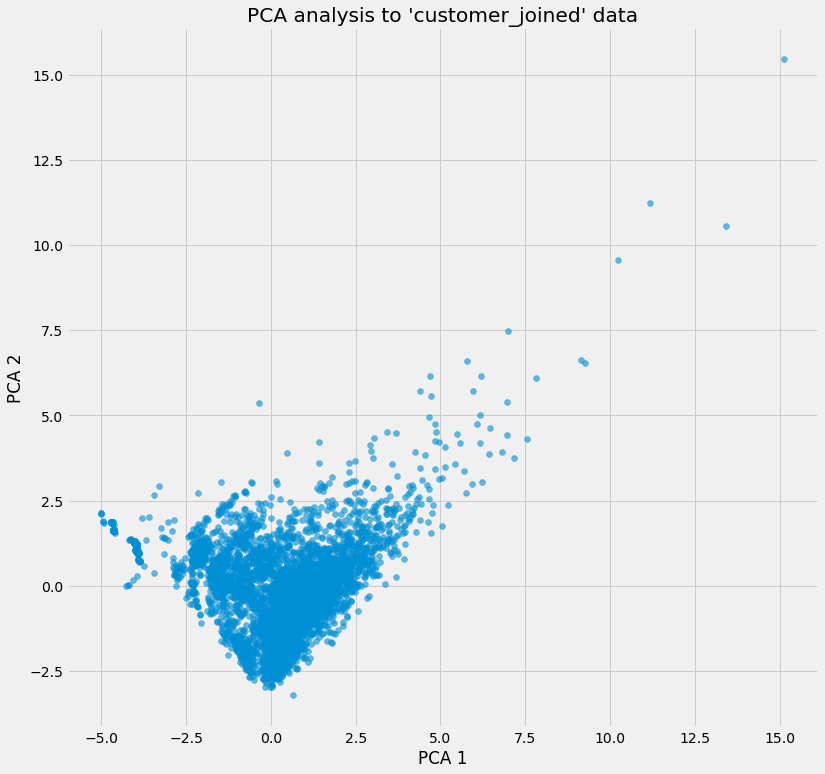

PC_1 explains 0.337579324511084, PC_2 explains 0.1677972730665548
Total ratio explained by PC_1 and PC_2 is 1.0


C:\Users\jiawe\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


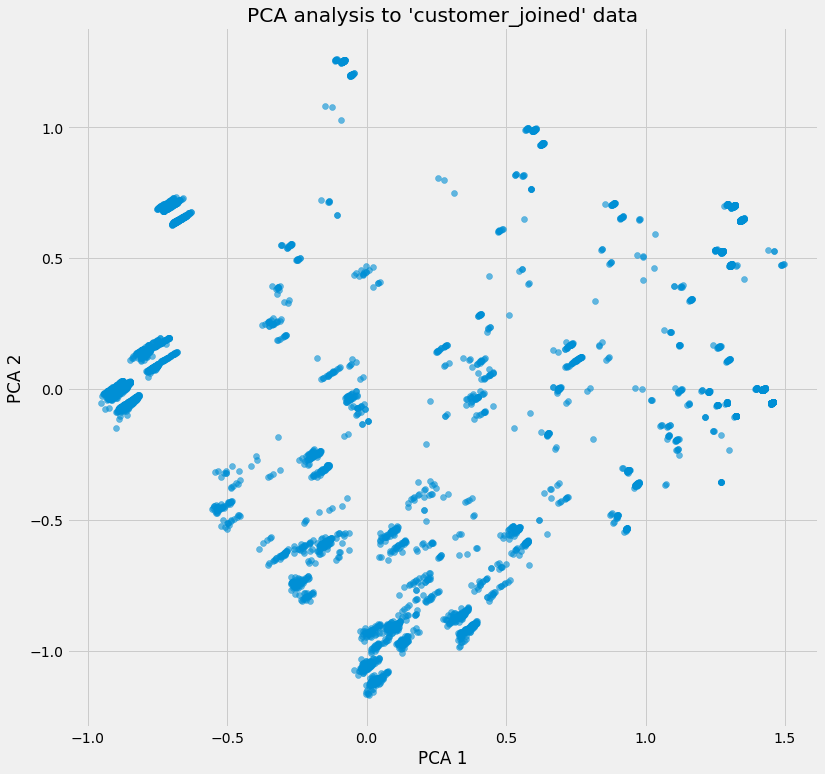

PC_1 explains 0.3021666708564287, PC_2 explains 0.1417707166878931
Total ratio explained by PC_1 and PC_2 is 0.9192210977899238


C:\Users\jiawe\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


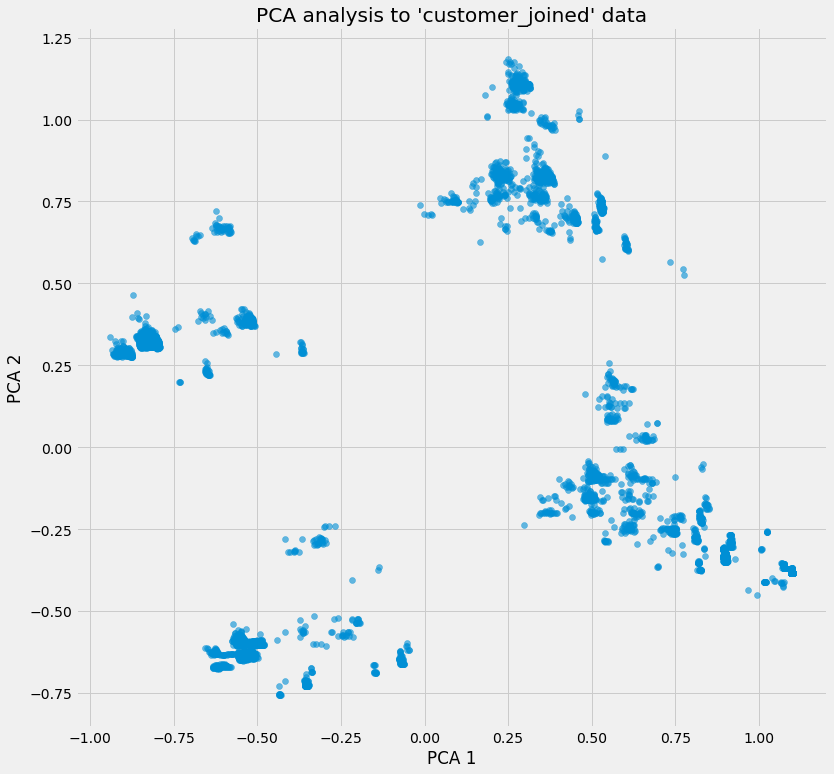

PC_1 explains 0.31300416535835673, PC_2 explains 0.19843620534014755
Total ratio explained by PC_1 and PC_2 is 0.9415031391879841


In [491]:
# PCA for fun

customer_joined_1 = customer_joined.drop(columns="cust_id")

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import category_encoders as ce

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer

oh_encoder = ce.OneHotEncoder()
od_encoder = ce.OrdinalEncoder()
poly_encoder = ce.PolynomialEncoder()
sum_encoder = ce.SumEncoder()

sd_scaler = StandardScaler()
mm_scaler = MinMaxScaler()


pca_pipe_1 = make_pipeline(od_encoder,mm_scaler)
pca_pipe_2 = make_pipeline(od_encoder,sd_scaler)
pca_pipe_3 = make_pipeline(poly_encoder,mm_scaler)
pca_pipe_4 = make_pipeline(sum_encoder,mm_scaler)

pipelines = [pca_pipe_1, pca_pipe_2, pca_pipe_3, pca_pipe_4]

pipe_dict = {
    0:"pca_pipe_1",
    1:"pca_pipe_2",
    2:'pca_pipe_3',
    3:'pca_pipe_4'
}

for i,pipeline in enumerate(pipelines):

    scaled_df1 = pipeline.fit_transform(customer_joined_1)

    pca = PCA(n_components=10)
    pca_data = pca.fit_transform(scaled_df1)


# PCA plot
    plt.figure(figsize=(12,12))

    plt.scatter(x = pca_data[:,0],
                y = pca_data[:,1],
                alpha= 0.6,            #alpha here is the tranparency
                cmap = "plasma")       #cmap here is the color        

    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.title("PCA analysis to 'customer_joined' data")
    plt.style.use('fivethirtyeight')

    plt.show()

    print("PC_1 explains {}, PC_2 explains {}".format(pca.explained_variance_ratio_[0],pca.explained_variance_ratio_[1]))
    print("Total ratio explained by PC_1 and PC_2 is {}".format(pca.explained_variance_ratio_.sum()))

C:\Users\jiawe\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


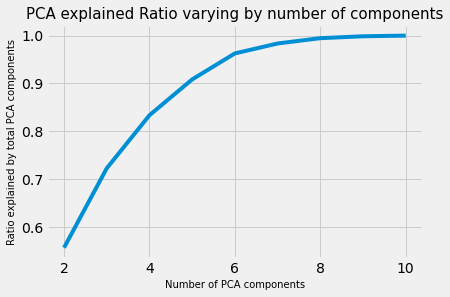

In [492]:
# PCA list to the most effiecent n

# pipe_1
pca_list = []
pca_count = np.arange(2,11)


scaled_df1 = pca_pipe_1.fit_transform(customer_joined_1)


for n in range(2,11):

    pca = PCA(n_components=n)
    pca_data = pca.fit_transform(scaled_df1) 
    pca_list.append(pca.explained_variance_ratio_.sum())

sns.lineplot(x=pca_count,y=pca_list,)

plt.xlabel("Number of PCA components",fontsize = 10)
plt.ylabel("Ratio explained by total PCA components",fontsize = 10)
plt.title("PCA explained Ratio varying by number of components", fontsize=15)

plt.show()

C:\Users\jiawe\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


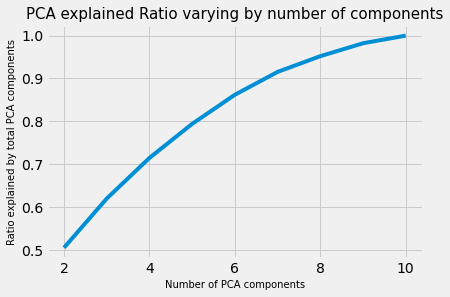

In [493]:
# PCA list to the most effiecent n

# pipe_2
pca_list = []
pca_count = np.arange(2,11)


scaled_df1 = pca_pipe_2.fit_transform(customer_joined_1)


for n in range(2,11):

    pca = PCA(n_components=n)
    pca_data = pca.fit_transform(scaled_df1) 
    pca_list.append(pca.explained_variance_ratio_.sum())

sns.lineplot(x=pca_count,y=pca_list,)

plt.xlabel("Number of PCA components",fontsize = 10)
plt.ylabel("Ratio explained by total PCA components",fontsize = 10)
plt.title("PCA explained Ratio varying by number of components", fontsize=15)

plt.show()

C:\Users\jiawe\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


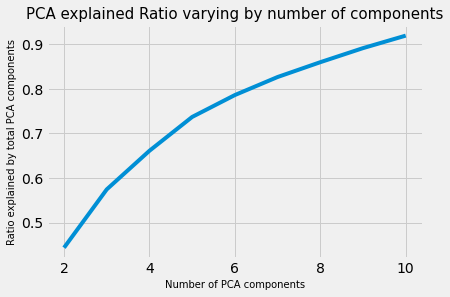

In [494]:
# PCA list to the most effiecent n

# pipe_2
pca_list = []
pca_count = np.arange(2,11)


scaled_df1 = pca_pipe_3.fit_transform(customer_joined_1)


for n in range(2,11):

    pca = PCA(n_components=n)
    pca_data = pca.fit_transform(scaled_df1) 
    pca_list.append(pca.explained_variance_ratio_.sum())

sns.lineplot(x=pca_count,y=pca_list,)

plt.xlabel("Number of PCA components",fontsize = 10)
plt.ylabel("Ratio explained by total PCA components",fontsize = 10)
plt.title("PCA explained Ratio varying by number of components", fontsize=15)

plt.show()

C:\Users\jiawe\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


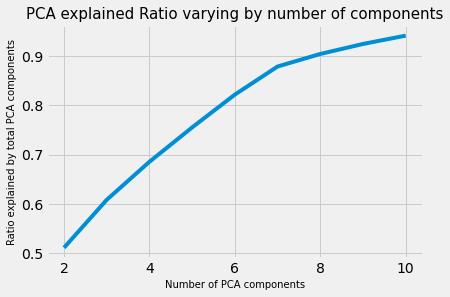

In [495]:
# PCA list to the most effiecent n

# pipe_2
pca_list = []
pca_count = np.arange(2,11)


scaled_df1 = pca_pipe_4.fit_transform(customer_joined_1)


for n in range(2,11):

    pca = PCA(n_components=n)
    pca_data = pca.fit_transform(scaled_df1) 
    pca_list.append(pca.explained_variance_ratio_.sum())

sns.lineplot(x=pca_count,y=pca_list,)

plt.xlabel("Number of PCA components",fontsize = 10)
plt.ylabel("Ratio explained by total PCA components",fontsize = 10)
plt.title("PCA explained Ratio varying by number of components", fontsize=15)

plt.show()

In [360]:
# K-mean clustering

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score

In [496]:
# metrics function

## validation metircs
## The silhouette ranges from −1 to +1, 
## where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters

## The Calinski-Harabasz index also known as the Variance Ratio Criterion, 
## is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, 
## the higher the score , the better the performances.
def internal_metrics(model,X_input):

    print()
    print()
    sil_score = silhouette_score(X_input, model.labels_)
    ch_score = calinski_harabasz_score(X_input, model.labels_)
    print("silhouette score is {}".format(round(sil_score,4)))
    print("calinski harabasz score is {}".format(round(ch_score,4)))

In [497]:
k_mean_df = pca_pipe_2.fit_transform(customer_joined_1)


k_means = KMeans(n_clusters=4, random_state=42)
k_means.fit(k_mean_df)

WCSS_score = k_means.inertia_

internal_metrics(k_means,k_mean_df)
print("WCSS score is {}".format(round(WCSS_score,4)))

C:\Users\jiawe\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):




silhouette score is 0.2635
calinski harabasz score is 1439.2908
WCSS score is 30664.3776


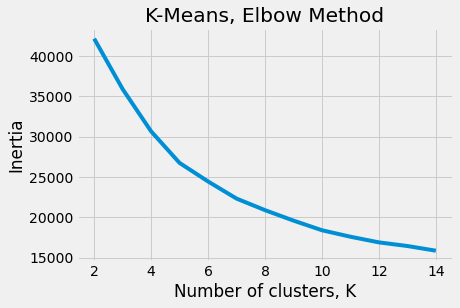

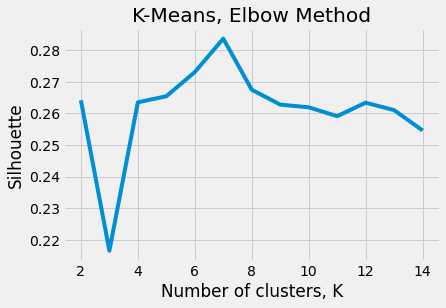

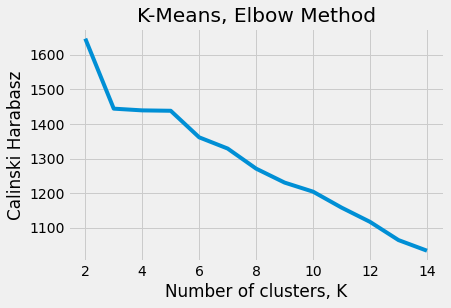

In [498]:
# elbow method for best K

inertias = {}
silhouettes = {}
ch = {}

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(k_mean_df)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(k_mean_df, kmeans.labels_, metric='euclidean')
    ch[k] = calinski_harabasz_score(k_mean_df, kmeans.labels_)

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");

plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

plt.figure();
plt.plot(list(ch.keys()), list(ch.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Calinski Harabasz");

# seems like 4 is the best K
# we we will use pipeline_1 for the clustering algorithm

### Personas

In [499]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

labels = k_means.labels_
customer_joined["Cluster ID"] = labels

means = np.zeros((4, k_mean_df.shape[1]))

for i, label in enumerate(set(labels)):
    means[i,:] = k_mean_df[labels==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, sum(labels==label)))
    print(sd_scaler.inverse_transform(means[i,:]))
    
means


Cluster 0 (n=390):
[    1.53     1.05   909.95     2.       2.01     3.38     1.      19.41
 10290.82  2013.96]

Cluster 1 (n=1717):
[     1.63      1.49  25766.84      2.83      3.43      1.        0.
     67.35 250411.45  20398.57]

Cluster 2 (n=2122):
[     1.65      2.96  64287.12      3.07      3.35      1.01      0.
     50.68 717951.21  40126.13]

Cluster 3 (n=1254):
[     1.59      2.14  14094.1       2.19      2.49      3.23     -0.
     29.45 216837.13  15881.03]


array([[-0.13, -1.4 , -1.01, -0.75, -1.03,  1.44,  3.61, -1.49, -0.76,
        -0.84],
       [ 0.01, -0.85, -0.3 ,  0.12,  0.33, -0.58, -0.28,  0.94, -0.3 ,
        -0.19],
       [ 0.04,  0.97,  0.8 ,  0.38,  0.26, -0.57, -0.28,  0.09,  0.6 ,
         0.51],
       [-0.05, -0.05, -0.63, -0.56, -0.57,  1.31, -0.28, -0.98, -0.36,
        -0.35]])

In [502]:
pca_pipe_2

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['gender', 'workActivity',
                                      'relationshipStatus', 'habitationStatus',
                                      'schoolAttendance'],
                                mapping=[{'col': 'gender',
                                          'data_type': dtype('O'),
                                          'mapping': Female    1
Male      2
Other     3
NaN      -2
dtype: int64},
                                         {'col': 'workActivity',
                                          'data_type': dtype('O'),
                                          'mapping': unknown     1
parttime    2
fulltime    3
NaN        -2
dtype: int64},
                                         {'col': 'relationsh...
                                          'mapping': Widowed      1
Single       2
Married      3
Separated    4
Divorced     5
NaN         -2
dtype: int64},
                                         {

In [501]:
from scipy import stats

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

def stats_to_df(d, scaler):
    tmp_df = pd.DataFrame(columns=customer_joined_1.columns)
    
    tmp_df.loc[0] = scaler.inverse_transform(d.minmax[0])
    tmp_df.loc[1] = scaler.inverse_transform(d.mean)
    tmp_df.loc[2] = scaler.inverse_transform(d.minmax[1])
    tmp_df.loc[3] = scaler.inverse_transform(d.variance)
    tmp_df.loc[4] = scaler.inverse_transform(d.skewness)
    tmp_df.loc[5] = scaler.inverse_transform(d.kurtosis)
    tmp_df.index = ['Min', 'Mean', 'Max', 'Variance', 'Skewness', 'Kurtosis'] 
    return tmp_df.T

print('All Data:')
print('Number of Instances: {}'.format(k_mean_df.shape[0]))
d = stats.describe(k_mean_df, axis=0)
display(stats_to_df(d, sd_scaler))

for i, label in enumerate(set(labels)):
    d = stats.describe(k_mean_df[labels==label], axis=0)
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(d.nobs))
    display(stats_to_df(d, sd_scaler))

All Data:
Number of Instances: 5483


,Min,Mean,Max,Variance,Skewness,Kurtosis
gender,1.00,1.62,3.00,2.28,2.01,1.18
workActivity,1.00,2.18,3.00,2.99,1.91,1.05
totalIncome,0.00,36237.06,365126.30,71219.63,114975.78,357414.28
relationshipStatus,1.00,2.72,5.00,3.67,3.43,3.37
habitationStatus,1.00,3.08,4.00,4.13,2.41,2.04
schoolAttendance,1.00,1.68,6.00,2.86,3.33,2.06
schools,-0.00,0.07,1.00,0.33,0.93,2.42
age,16.00,48.82,109.00,68.56,56.27,34.43
total_balance,-902429.88,406597.86,10325446.52,928920.01,3182660.34,30604604.80
total_amount,0.00,25692.55,398560.86,54048.42,128346.21,731558.92



Cluster 0:
Number of Instances: 390


,Min,Mean,Max,Variance,Skewness,Kurtosis
gender,1.00,1.53,3.00,2.12,1.94,1.14
workActivity,1.00,1.05,3.00,2.25,6.87,31.28
totalIncome,0.00,909.95,75592.44,37115.22,348783.62,3447384.67
relationshipStatus,2.00,2.00,3.00,2.72,21.38,368.01
habitationStatus,1.00,2.01,3.00,3.11,3.99,33.83
schoolAttendance,3.00,3.38,6.00,2.24,3.75,3.25
schools,1.00,1.00,1.00,0.07,-0.19,-0.44
age,16.00,19.41,29.00,49.06,66.08,83.50
total_balance,-902429.88,10290.82,2146013.64,459561.89,2896066.70,42064271.75
total_amount,192.72,2013.96,74759.06,26602.58,311531.85,3525248.95



Cluster 1:
Number of Instances: 1717


,Min,Mean,Max,Variance,Skewness,Kurtosis
gender,1.00,1.63,3.00,2.33,2.04,1.14
workActivity,1.00,1.49,3.00,2.49,2.26,0.68
totalIncome,0.00,25766.84,203371.00,47188.25,111897.72,376464.60
relationshipStatus,1.00,2.83,5.00,3.77,2.66,3.25
habitationStatus,1.00,3.43,4.00,4.00,1.44,4.25
schoolAttendance,1.00,1.00,1.00,1.68,2.86,-0.68
schools,-0.00,0.00,-0.00,0.07,-0.19,-0.44
age,34.00,67.35,109.00,60.86,48.00,30.67
total_balance,-427598.01,250411.45,1598372.12,490963.83,1058108.77,3123557.07
total_amount,0.00,20398.57,108375.22,34122.99,71252.49,137930.39



Cluster 2:
Number of Instances: 2122


,Min,Mean,Max,Variance,Skewness,Kurtosis
gender,1.00,1.65,3.00,2.30,1.98,1.13
workActivity,1.00,2.96,3.00,2.26,-3.57,42.36
totalIncome,20075.00,64287.12,365126.30,75975.42,121042.78,367651.90
relationshipStatus,1.00,3.07,5.00,3.76,3.22,2.76
habitationStatus,1.00,3.35,4.00,3.98,1.61,3.93
schoolAttendance,1.00,1.01,4.00,1.69,20.31,386.52
schools,-0.00,0.00,-0.00,0.07,-0.19,-0.44
age,22.00,50.68,108.00,55.84,57.49,45.51
total_balance,-222.08,717951.21,10325446.52,1320462.95,2802935.45,20609427.37
total_amount,222.44,40126.13,398560.86,74953.97,108425.46,458556.54



Cluster 3:
Number of Instances: 1254


,Min,Mean,Max,Variance,Skewness,Kurtosis
gender,1.00,1.59,3.00,2.21,2.00,1.22
workActivity,1.00,2.14,3.00,2.53,2.26,2.33
totalIncome,0.00,14094.10,75475.95,39224.82,83286.80,144317.75
relationshipStatus,1.00,2.19,5.00,2.96,5.40,12.81
habitationStatus,1.00,2.49,4.00,3.92,3.61,2.20
schoolAttendance,1.00,3.23,4.00,2.70,0.69,0.50
schools,-0.00,-0.00,-0.00,0.07,0.33,-0.44
age,22.00,29.45,55.00,49.88,70.53,109.12
total_balance,0.00,216837.13,1763582.50,471894.79,1543426.90,4945023.81
total_amount,96.00,15881.03,82996.66,31184.62,68458.13,110429.30


### clustering only on customer data 

In [226]:
# EDA on customer (if missing values)
import klib

GridSpec(6, 6)

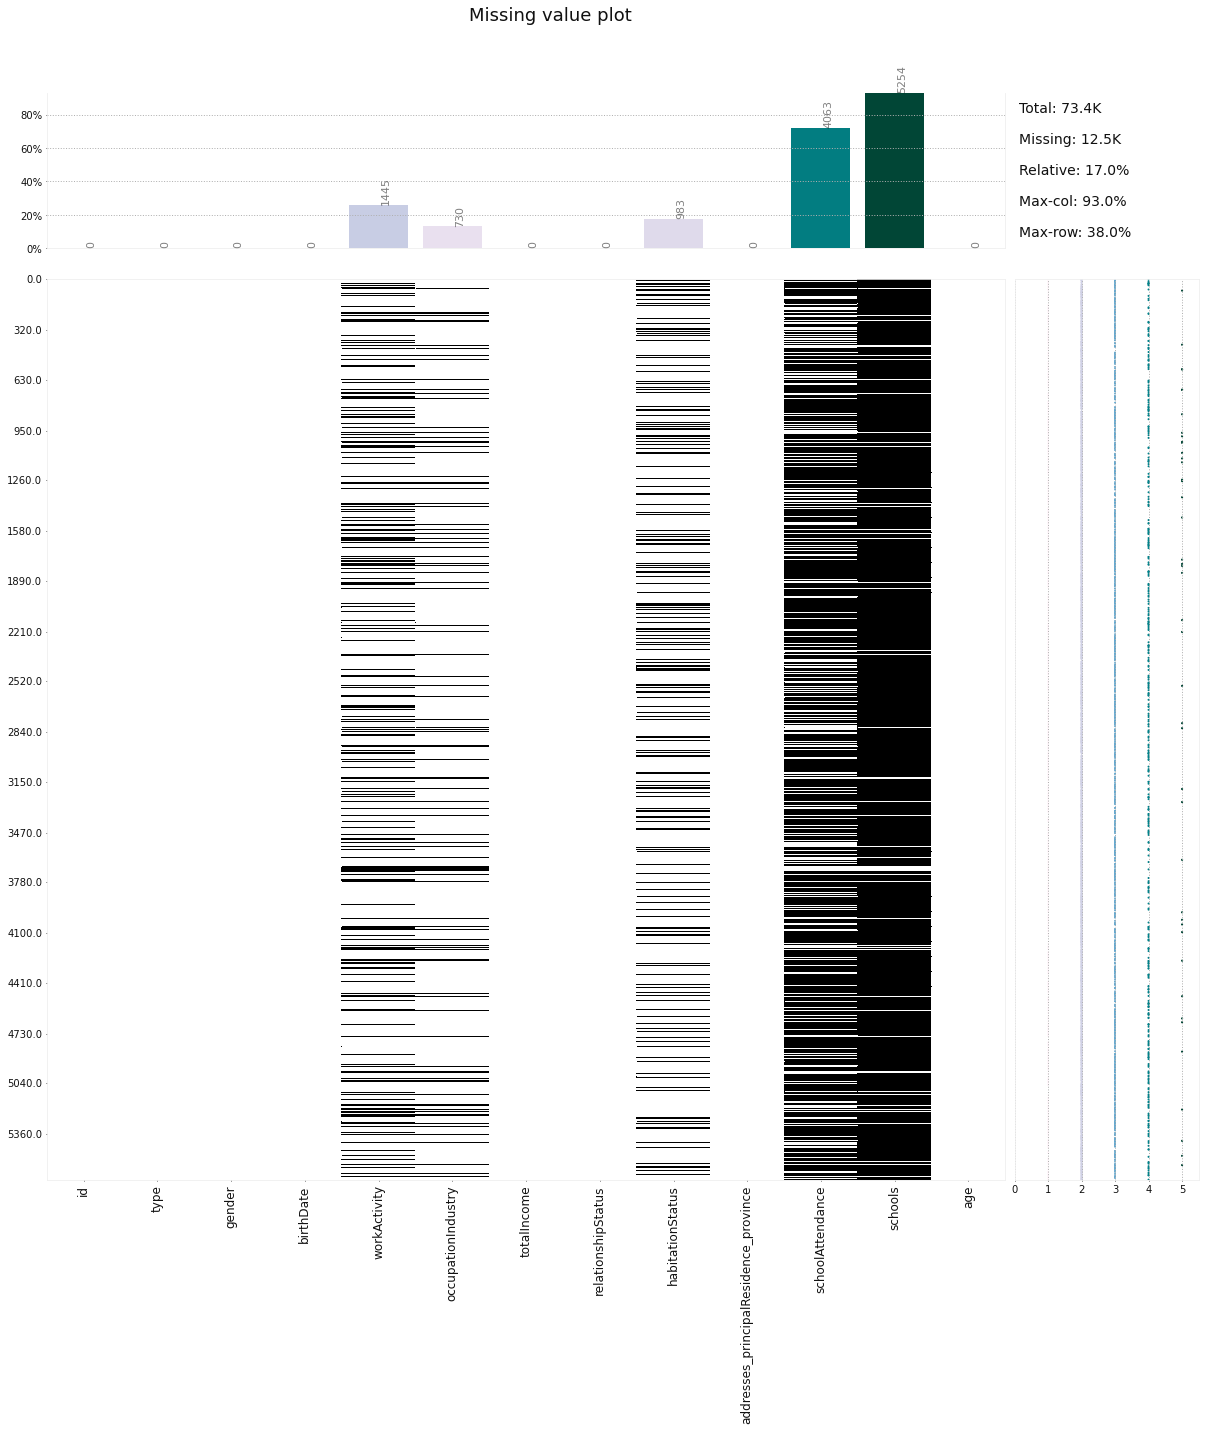

In [227]:
klib.missingval_plot(customer)

In [392]:
# fill missing values
# we will drop off id, type(due to all personal), birthDate(we have age), occupationIndustry

customer_1 = customer.copy()


customer_1["workActivity"] = customer_1["workActivity"].fillna(value="unknown")
customer_1["habitationStatus"] = customer_1["habitationStatus"].fillna(value="unknown")
customer_1["schoolAttendance"] = customer_1["schoolAttendance"].fillna(value="unknown")
customer_1["schools"] = customer_1["schools"].fillna(value=0)

customer_1.drop(columns=["id","type","birthDate","occupationIndustry"], inplace = True)


# there is no missing values
customer_1.isna().sum()

gender                                   0
workActivity                             0
totalIncome                              0
relationshipStatus                       0
habitationStatus                         0
addresses_principalResidence_province    0
schoolAttendance                         0
schools                                  0
age                                      0
dtype: int64

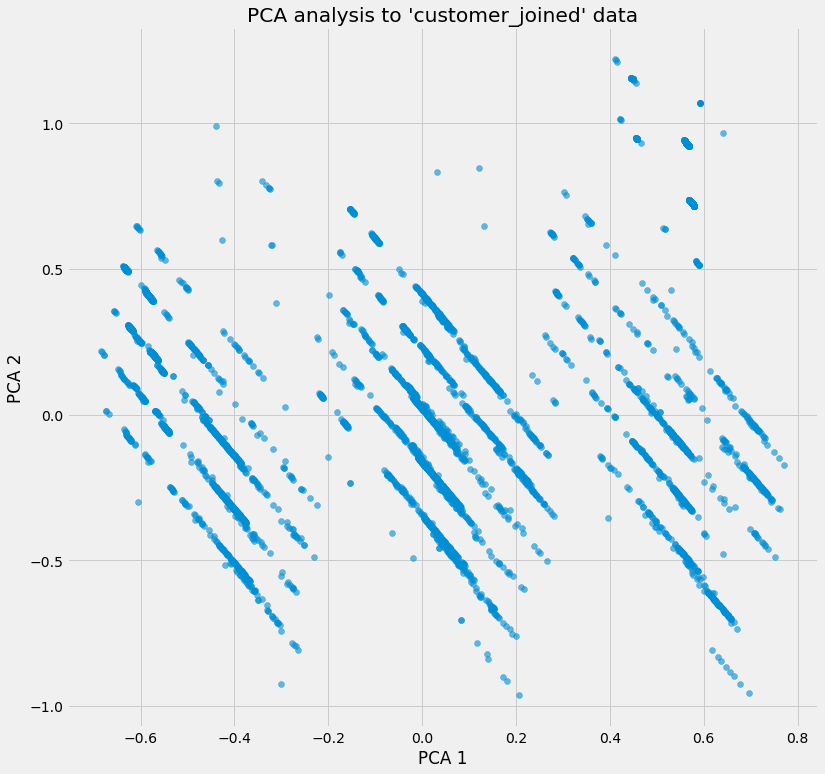

PC_1 explains 0.2882996784494134, PC_2 explains 0.24323399442502996
Total ratio explained by PC_1 and PC_2 is 1.0


C:\Users\jiawe\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


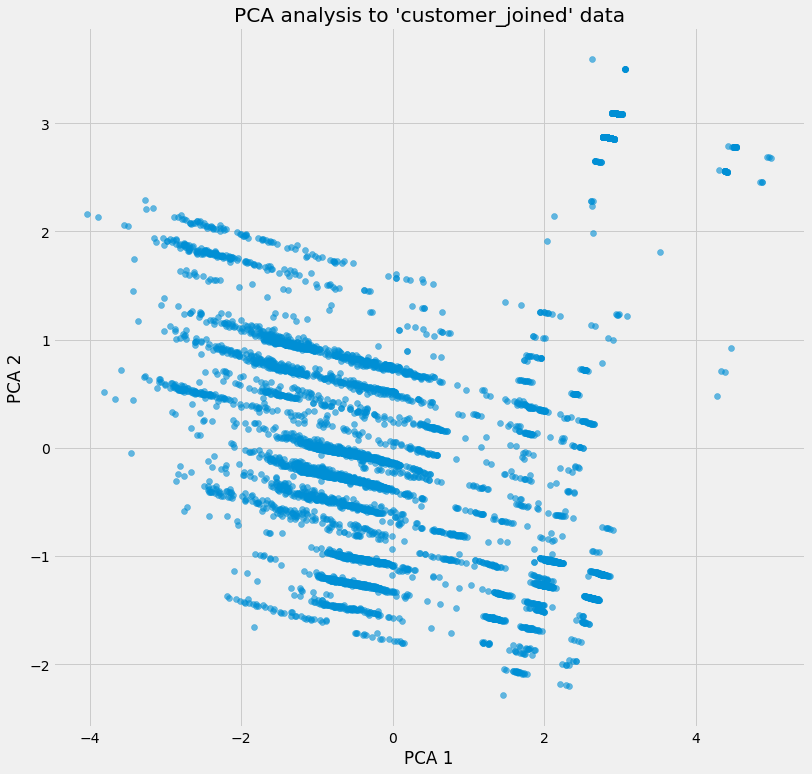

PC_1 explains 0.32756674845905354, PC_2 explains 0.17450048543282423
Total ratio explained by PC_1 and PC_2 is 1.0


C:\Users\jiawe\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


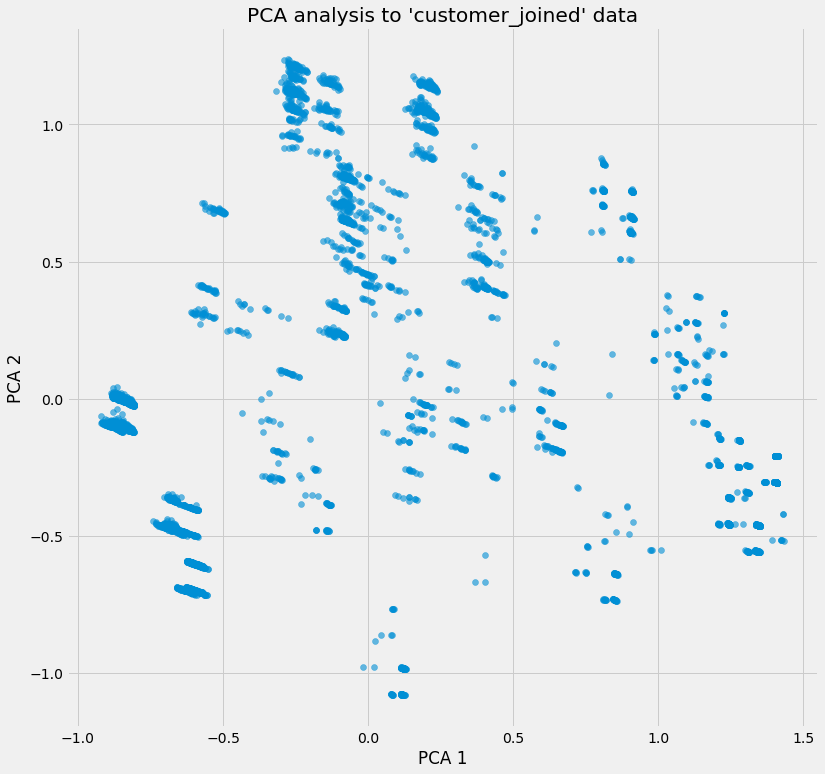

PC_1 explains 0.28437252860428186, PC_2 explains 0.1530964817453631
Total ratio explained by PC_1 and PC_2 is 0.8953767586930845


In [395]:
# cluster only on customer data
# PCA for fun


oh_encoder = ce.OneHotEncoder()
od_encoder = ce.OrdinalEncoder()
poly_encoder = ce.PolynomialEncoder()

sd_scaler = StandardScaler()
mm_scaler = MinMaxScaler()


pca_pipe_1 = make_pipeline(od_encoder,mm_scaler)
pca_pipe_2 = make_pipeline(od_encoder,sd_scaler)
pca_pipe_3 = make_pipeline(poly_encoder,mm_scaler)


pipelines = [pca_pipe_1, pca_pipe_2, pca_pipe_3]

pipe_dict = {
    0:"pca_pipe_1",
    1:"pca_pipe_2",
    2:'pca_pipe_3'
}

for i,pipeline in enumerate(pipelines):

    scaled_df1 = pipeline.fit_transform(customer_1)

    pca = PCA(n_components=9)
    pca_data = pca.fit_transform(scaled_df1)


# PCA plot
    plt.figure(figsize=(12,12))

    plt.scatter(x = pca_data[:,0],
                y = pca_data[:,1],
                alpha= 0.6,            #alpha here is the tranparency
                cmap = "plasma")       #cmap here is the color        

    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.title("PCA analysis to 'customer_joined' data")
    plt.style.use('fivethirtyeight')

    plt.show()

    print("PC_1 explains {}, PC_2 explains {}".format(pca.explained_variance_ratio_[0],pca.explained_variance_ratio_[1]))
    print("Total ratio explained by PC_1 and PC_2 is {}".format(pca.explained_variance_ratio_.sum()))

C:\Users\jiawe\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


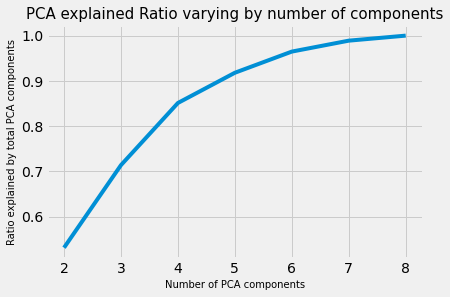

In [397]:
# PCA list to the most effiecent n

# pipe_1
pca_list = []
pca_count = np.arange(2,9)


scaled_df1 = pca_pipe_1.fit_transform(customer_1)


for n in range(2,9):

    pca = PCA(n_components=n)
    pca_data = pca.fit_transform(scaled_df1) 
    pca_list.append(pca.explained_variance_ratio_.sum())

sns.lineplot(x=pca_count,y=pca_list,)

plt.xlabel("Number of PCA components",fontsize = 10)
plt.ylabel("Ratio explained by total PCA components",fontsize = 10)
plt.title("PCA explained Ratio varying by number of components", fontsize=15)

plt.show()

In [398]:
# K-means on only customer data

k_mean_df = pca_pipe_1.fit_transform(customer_1)


k_means = KMeans(n_clusters=10, random_state=42)
k_means.fit(k_mean_df)

WCSS_score = k_means.inertia_

internal_metrics(k_means,k_mean_df)
print("WCSS score is {}".format(round(WCSS_score,4)))

C:\Users\jiawe\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):




silhouette score is 0.3699
calinski harabasz score is 1681.1928
WCSS score is 854.5304


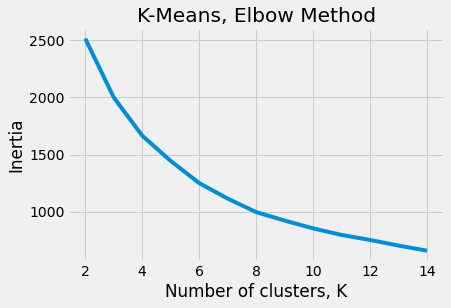

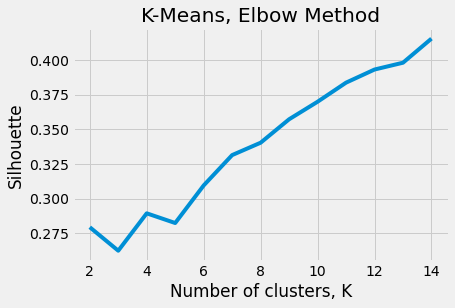

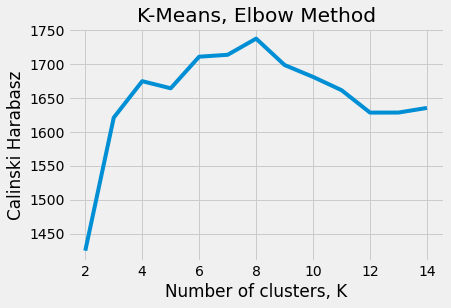

In [399]:
# elbow method for best K

inertias = {}
silhouettes = {}
ch = {}

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(k_mean_df)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(k_mean_df, kmeans.labels_, metric='euclidean')
    ch[k] = calinski_harabasz_score(k_mean_df, kmeans.labels_)

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");

plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

plt.figure();
plt.plot(list(ch.keys()), list(ch.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Calinski Harabasz");

# seems like 5 is the best K